<a href="https://colab.research.google.com/github/rajnishdascse/Machine_Learning/blob/gh-pages/ReaLImage(NumberDetection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%tensorflow_version 2.x

In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [12]:
#input image dimensions
img_rows , img_cols = 28,28

#the number of training samples per batch. 128 is a reasonable number
batch_size = 128

#out data set contains 10 digits , sp the number of classes is 10
num_classes =10

#epochs is the number of times the model is trained with the data set, more can be better , up to a point
epochs = 20

#dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5


In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#save original test images for display purpose
orig_test = x_test

In [14]:
if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shap = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


#Define model

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation ='relu', input_shape = input_shape))
model.add(Conv2D(64,(3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

#Train the model

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2438 - accuracy: 0.9258 - val_loss: 0.0585 - val_accuracy: 0.9812
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0849 - accuracy: 0.9748 - val_loss: 0.0373 - val_accuracy: 0.9867
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0622 - accuracy: 0.9810 - val_loss: 0.0339 - val_accuracy: 0.9885
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0318 - val_accuracy: 0.9895
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0330 - val_accuracy: 0.9907
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0279 - val_accuracy: 0.9905
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0298 - val_accuracy: 0.9912
Epoch 

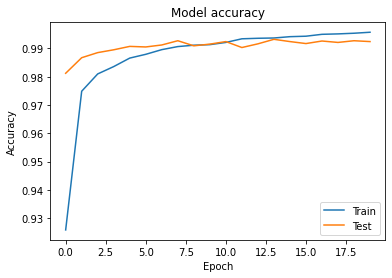

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(), metrics =['accuracy'])

#train the model for a given number of epochs

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data = (x_test, y_test))

#evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [17]:
from skimage import io, transform

Orginal image shape (473, 361, 4)


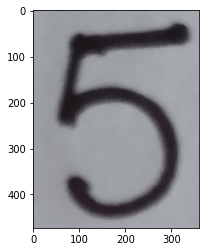

In [18]:
rgb = io.imread('5.png')
print(f'Orginal image shape {rgb.shape}')
plt.imshow(rgb)

#Convert to grayscale

Grayscale image shape (473, 361)


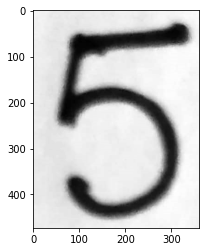

In [19]:
gray = np.dot(rgb[...,:], [0.299, 0.587, 0.114, 0])
print(f'Grayscale image shape {gray.shape}')
plt.imshow(gray, cmap = 'gray')

Resize to 28 x 28 pixels

Resized image shape (28, 28)


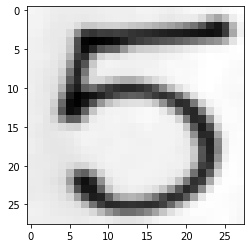

In [20]:
gray28x28 = transform.resize(gray, (img_rows, img_cols))
print(f'Resized image shape {gray28x28.shape}')
plt.imshow(gray28x28, cmap = 'gray')

Filter the background

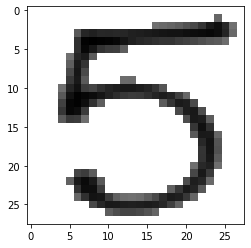

In [21]:
vectorized_filter = np.vectorize(lambda v: 255 if v >128 else v)
filtered = vectorized_filter(gray28x28)
plt.imshow(filtered, cmap ='gray')

Invert the image and scale pixel values

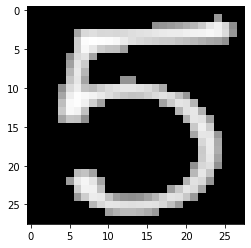

In [22]:
inverted = 255-filtered
reshaped = inverted.reshape(img_rows, img_cols, 1)/255.0
batch = np.array([reshaped])
plt.imshow(inverted, cmap ='gray')

In [23]:
batch.max()

0.8980392156862745

In [24]:
#Make a prediction using previously trained model
predictions = model.predict(batch)
most_likely = predictions.argmax(1)
most_likely

array([5])

#Plot Probabilities

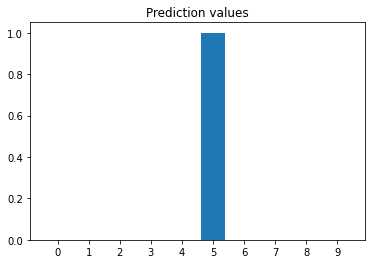

In [25]:
plt.bar(range(10), predictions[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()